<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment2/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 - Q5 (logistic regression model, notMNIST)**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import os
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/MohsenJadidi/ISLR/master/Assignment2/notMNIST.npz', 'notMNIST.npz')

('notMNIST.npz', <http.client.HTTPMessage at 0x7fdb72cb3ef0>)

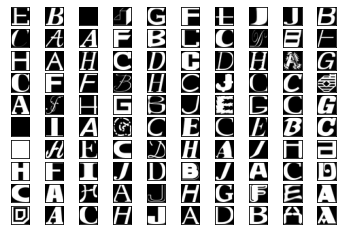

In [17]:
letter = 'A B C D E F G H I J'.split(" ") # letter = ['A', 'B', ..., 'I', 'J']
num = [i for i in range(len(letter))]
dic = dict(zip(num, letter))

with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    # Visualizing
    fig = plt.figure(num=1)
    for i in range(100):
        ax = fig.add_subplot(10,10,i+1)
        img = ax.imshow(Data[:,:,i*100], cmap='gray') 
        #ax.set_xlabel('A')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    #plt.tight_layout()    
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[:,:,dataIndx[:,0]]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]